# Filtrado de senoidales

In [1]:
#%matplotlib qt5
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def plot_resp_freq(freq, H_w, tipo='lineal'):

    if tipo == 'lineal':
        #Calculos de fase y magnitud
        mag_Hw = np.abs(H_w)
        fase_Hw = np.angle(H_w)

        # Figura con dos subplots
        fig, ax = plt.subplots(1,2)
        fig.suptitle('Respuesta en Frecuencia', fontsize=22)
        fig.set_size_inches(20, 10)
        ax[0].plot(freq,mag_Hw)
        ax[1].plot(freq,fase_Hw)
        # add lables
        ax[0].set_xlabel("Frecuencia  \u03C9", fontsize=16)
        ax[0].set_ylabel("Magnitud |H(j*\u03C9)|", fontsize=16)
        ax[1].set_ylabel("Fase \u2220H(j*\u03C9)", fontsize=16)
        ax[1].set_xlabel("Frecuencia \u03C9", fontsize=16)
        ax[0].grid(True)
        ax[1].grid(True)
        plt.show()

    elif tipo == 'bode':
        #Transformacion a decibeles
        mag_Hw_dB = 20*np.log10(np.abs(H_w))
        fase_Hw = np.angle(H_w)*180/np.pi

        #Conservo solo lo que corresponde a frecuencias positivas
        indx = np.where(freq >= 0.01)
        mag_Hw_dB = mag_Hw_dB[indx]
        fase_Hw = fase_Hw[indx]
        freq = freq[indx]

        # Figura con dos subplots
        fig, ax = plt.subplots(1,2)
        fig.suptitle('Respuesta en Frecuencia', fontsize=22)
        fig.set_size_inches(20, 10)
        ax[0].plot(freq,mag_Hw_dB)
        ax[0].semilogx()
        ax[1].plot(freq,fase_Hw)
        ax[1].semilogx()
        # add lables
        ax[0].set_xlabel("Frecuencia  \u03C9", fontsize=16)
        ax[0].set_ylabel("Magnitud 20*log10|H(j*\u03C9)| [dB]", fontsize=16)
        ax[1].set_ylabel("Fase \u2220H(j*\u03C9)", fontsize=16)
        ax[1].set_xlabel("Frecuencia \u03C9", fontsize=16)
        ax[0].grid(True)
        ax[1].grid(True)
        plt.show()

## Filtro Pasa-Bajos
<font size=6>
Suponga un filtro con la siguiente función de transferencia:  $H(s) = \frac{{\omega}_c}{(s+{\omega}_c)} = \frac{(2*\pi*10)}{(s+2*\pi*10)}$
    
La respuesta en frecuencia del filtro es: $H(j\omega) = \frac{(2*\pi*10)}{(j\omega+2*\pi*10)}$    

Cual es la frecuencia de corte ${\omega}_c$?
<font>

In [3]:
w = np.arange(-7000,7000, 0.1)
H_LP = 2*np.pi*10/(1j*w + 2*np.pi*10)

<font size=4> Respuesta en frecuencia del filtro <font>

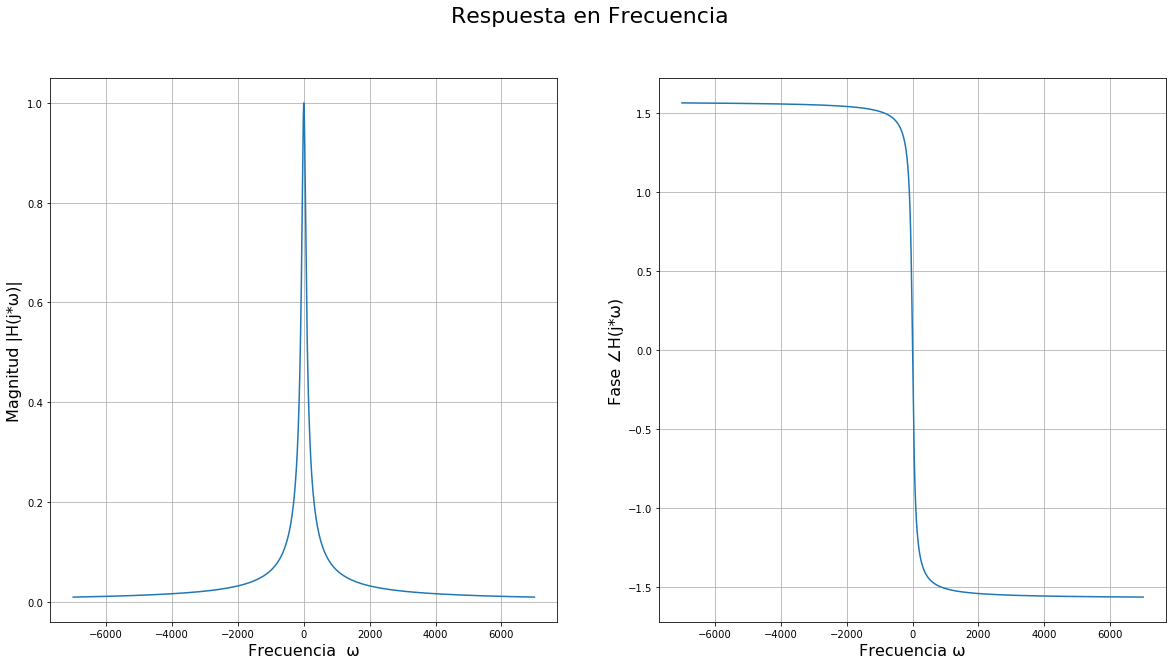

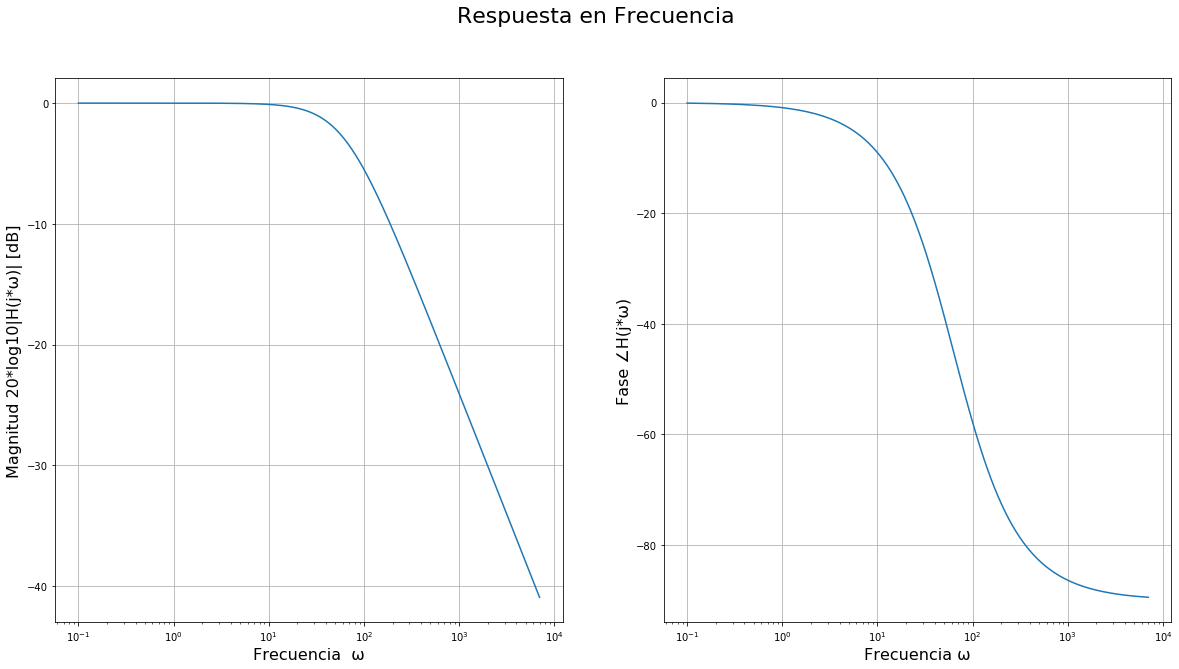

In [4]:
plot_resp_freq(w, H_LP, 'lineal')
plot_resp_freq(w, H_LP, 'bode')

## Salida del filtro

![title](figs/sistema_bloque.png)

<font size=4> 
* Supongamos una señal de $f = 5 Hz \to x(t) = A*sin(2\pi*f*t + \phi)$
<font>

In [6]:
DURATION = 5.0  # Segs
SAMPLE_RATE = 100 # Hertz
AMPL = 6.0
PHASE = 0.0

#Vector de tiempos
t = np.arange(0,DURATION, 1/SAMPLE_RATE)

<StemContainer object of 3 artists>

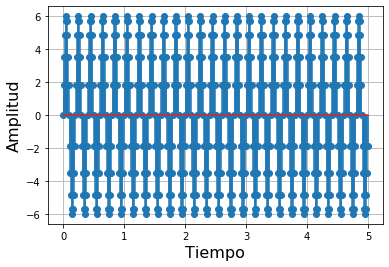

In [7]:
FRECUENCY = 5.0 # Hertz
#print(t)
x1 = AMPL*np.sin(2 * np.pi * FRECUENCY * t + PHASE)
#print(y)

# Plot de la senal
fig1, ax1 = plt.subplots()
ax1.set_xlabel("Tiempo", fontsize=16)
ax1.set_ylabel("Amplitud", fontsize=16)
ax1.grid(True)
ax1.stem(t, x1,use_line_collection = True)

<font size=6>
Evaluamos la salida del filtro cuando la entrada es ${x}_1$.
    
    
Como vimos la respuesta en frecuencia del filtro es: $H(j\omega) = \frac{(2*\pi*10)}{(j\omega+2*\pi*10)}$    
    
Y recordemos que:

$A*sin({\omega}_1*t+\theta) \Longrightarrow |H(j{\omega}_1)|*A* sin({\omega}_1*t+\theta+\angle H(j{\omega}_1)) $
    

Busquemos la magnitud y la fase del filtro para la frecuencia de la senoidal ${\omega}_1$
<font>

In [8]:
w1 = 2*np.pi*FRECUENCY
# Magnitud del filtro a la frecuencia w1
FilterMag = np.abs(2*np.pi*10/(1j*w1 + 2*np.pi*10))
print("Magnitud Lineal: {0:8.2f}. Magnitud en decibeles: {1:8.2f} [dB]".format(FilterMag,20*np.log10(FilterMag)))

# Fase del filtro a la frecuencia w1
FilterPhase = np.angle(2*np.pi*10/(1j*w1 + 2*np.pi*10))
print("Fase en radianes: {0:8.2f}. Fase en grados: {1:8.2f} [grad]".format(FilterPhase,FilterPhase*180/np.pi))

Magnitud Lineal:     0.89. Magnitud en decibeles:    -0.97 [dB]
Fase en radianes:    -0.46. Fase en grados:   -26.57 [grad]


In [11]:
print(FilterPhase*0.2/(2*np.pi))

-0.014758361765043328


In [8]:
y1 = FilterMag*AMPL*np.sin((2 * np.pi) * int(FRECUENCY) * t + PHASE + FilterPhase)

In [9]:
fig2, ax2 = plt.subplots()
ax2.plot(t, x1, t, y1)
# add lables
ax2.set_xlabel("Tiempo", fontsize=16)
ax2.set_ylabel("Amplttid", fontsize=16)
ax2.grid(True)
ax2.legend(['x1','y1'])

<font size=4>
* Supongamos una señal de $f = 10 Hz \to x(t) = A*sin(2\pi*f*t + \phi)$
<font>

In [12]:
FRECUENCY = 10.0 # Hertz

x2 = AMPL*np.sin((2 * np.pi) * int(FRECUENCY) * t + PHASE)
#print(x2)

w2 = 2*np.pi*FRECUENCY
FilterMag = np.abs(2*np.pi*10/(1j*w2 + 2*np.pi*10))
print("Magnitud Lineal: {0:8.2f}. Magnitud en decibeles: {1:8.2f} [dB]".format(FilterMag,20*np.log10(FilterMag)))
FilterPhase = np.angle(2*np.pi*10/(1j*w2 + 2*np.pi*10))
print("Fase en radianes: {0:8.2f}. Fase en grados: {1:8.2f} [grad]".format(FilterPhase,FilterPhase*180/np.pi))


y2 = FilterMag*AMPL*np.sin((2 * np.pi) * int(FRECUENCY) * t + PHASE + FilterPhase)
#print(y2)

Magnitud Lineal:     0.71. Magnitud en decibeles:    -3.01 [dB]
Fase en radianes:    -0.79. Fase en grados:   -45.00 [grad]


In [13]:
fig3, ax3 = plt.subplots()
ax3.plot(t, x2, t, y2)
# add lables
ax3.set_xlabel("Tiempo", fontsize=16)
ax3.set_ylabel("Amplttid", fontsize=16)
ax3.grid(True)
ax3.legend(['x2','y2'])

<font size=4>
* Supongamos una señal de $f = 100 Hz \to x(t) = A*sin(2\pi*f*t + \phi)$
<font>

In [17]:
DURATION = 1  # Segs
SAMPLE_RATE = 50000 # Hertz
AMPL = 6.0
PHASE = 0.0
t3 = np.arange(0,DURATION, 1/SAMPLE_RATE)
FRECUENCY = 1000 # Hertz

x3 = AMPL*np.sin((2 * np.pi) * int(FRECUENCY) * t3 + PHASE)
#print(x3)

w3 = 2*np.pi*FRECUENCY
FilterMag = np.abs(2*np.pi*10/(1j*w3 + 2*np.pi*10))
print("Magnitud Lineal: {0:8.2f}. Magnitud en decibeles: {1:8.2f} [dB]".format(FilterMag,20*np.log10(FilterMag)))
FilterPhase = np.angle(2*np.pi*10/(1j*w3 + 2*np.pi*10))
print("Fase en radianes: {0:8.2f}. Fase en grados: {1:8.2f} [grad]".format(FilterPhase,FilterPhase*180/np.pi))


y3 = FilterMag*AMPL*np.sin((2 * np.pi) * int(FRECUENCY) * t3 + PHASE + FilterPhase)
#print(y2)

Magnitud Lineal:     0.01. Magnitud en decibeles:   -40.00 [dB]
Fase en radianes:    -1.56. Fase en grados:   -89.43 [grad]


In [18]:
fig4, ax4 = plt.subplots()
ax4.plot(t3, x3, t3, y3)
# add lables
ax4.set_xlabel("Tiempo", fontsize=16)
ax4.set_ylabel("Amplttid", fontsize=16)
ax4.grid(True)
ax4.legend(['x3','y3'])

In [16]:
fig5, ax5 = plt.subplots()
ax5.plot(t,y1, t,y2, t3, y3)
# add lables
ax5.set_xlabel("Tiempo", fontsize=16)
ax5.set_ylabel("Amplttid", fontsize=16)
ax5.grid(True)
ax5.legend(['y1','y2','y3'])